## Caricamento delle Librerie e dei Dati

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df_NonNormalizzato = pd.read_csv("TabelloneNonNormalizzato.csv")
df = pd.read_csv("TabelloneNormalizzato.csv")

In [3]:
tmp = pd.DataFrame(df_NonNormalizzato['Date'])
tmp['DerivataGDP'] = df_NonNormalizzato['GDP'].diff()

diff_values = df_NonNormalizzato['GDP'].diff()

# Creare una nuova colonna con la derivata desiderata
tmp['derivata_desiderata'] = np.nan

# Inizializzare il primo valore
tmp.loc[0, 'derivata_desiderata'] = np.nan

# Calcolare la derivata desiderata
for i in range(1, len(tmp)):
    if diff_values[i] != 0:
        tmp.loc[i, 'DerivataGDP'] = diff_values[i]
    else:
        tmp.loc[i, 'DerivataGDP'] = tmp.loc[i - 1, 'DerivataGDP']

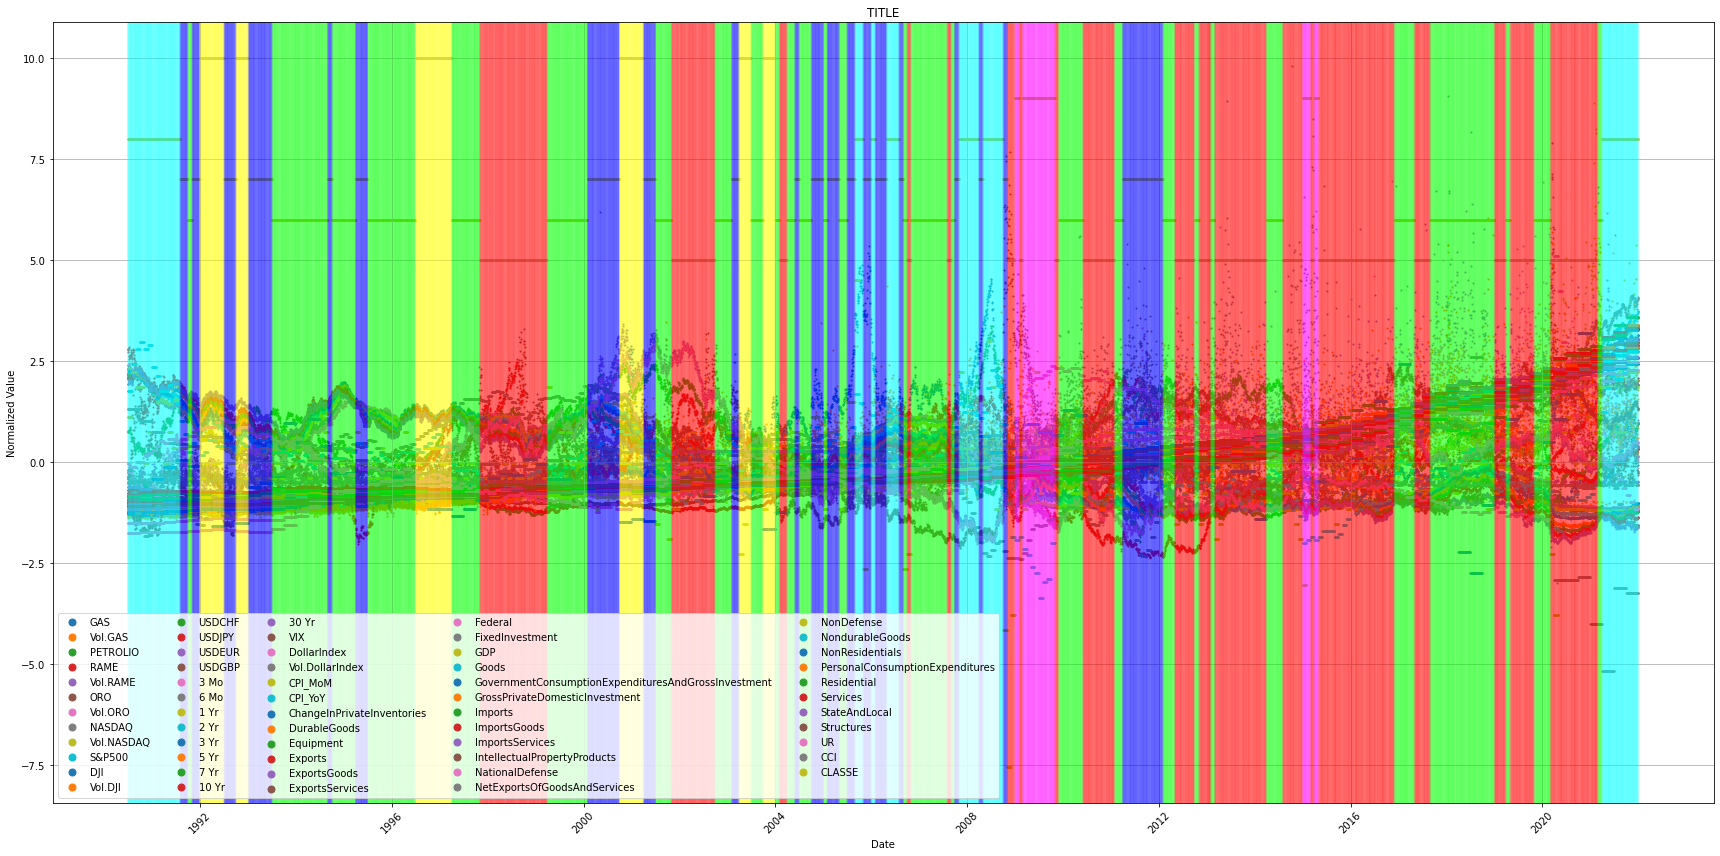

In [4]:
# Creiamo un grafico vuoto

df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

plt.figure(figsize=(24, 12))

#CRESCITA ECONOMICA CON INFLAZIONE BASSA
highlight_dates0 = df[(df_NonNormalizzato['CPI_YoY'] >= 0) & (df_NonNormalizzato['CPI_YoY'] < 2) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates0 = pd.to_datetime(highlight_dates0, format='%Y/%m/%d')
for date in highlight_dates0:
    plt.axvline(date, color=(1, 0, 0, 0.5), alpha=0.1)
    
highlight_dates1 = df[(df_NonNormalizzato['CPI_YoY'] >= 2) & (df_NonNormalizzato['CPI_YoY'] < 3) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates1 = pd.to_datetime(highlight_dates1, format='%Y/%m/%d')
for date in highlight_dates1:
    plt.axvline(date, color=(0, 1, 0, 0.5), alpha=0.1)
    
highlight_dates2 = df[(df_NonNormalizzato['CPI_YoY'] >= 3) & (df_NonNormalizzato['CPI_YoY'] < 4) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates2 = pd.to_datetime(highlight_dates2, format='%Y/%m/%d')
for date in highlight_dates2:
    plt.axvline(date, color=(0, 0, 1, 0.5), alpha=0.1)
    
highlight_dates3 = df[(df_NonNormalizzato['CPI_YoY'] >= 4) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates3 = pd.to_datetime(highlight_dates3, format='%Y/%m/%d')
for date in highlight_dates3:
    plt.axvline(date, color=(0, 1, 1, 0.5), alpha=0.1)
    
highlight_dates4 = df[(df_NonNormalizzato['CPI_YoY'] < 0) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates4 = pd.to_datetime(highlight_dates4, format='%Y/%m/%d')
for date in highlight_dates4:
    plt.axvline(date, color=(1, 0, 1, 0.5), alpha=0.1)
    
highlight_dates5 = df[tmp['DerivataGDP'] <= 0]['Date']
#highlight_dates5 = pd.to_datetime(highlight_dates5, format='%Y/%m/%d')
for date in highlight_dates5:
    plt.axvline(date, color=(1, 1, 0, 0.5), alpha=0.1)
    
for index, row in df.iterrows():
    if(df['Date'][index] in highlight_dates0.values):
        df.at[index, 'CLASSE'] = 0 + 5
    if(df['Date'][index] in highlight_dates1.values):
        df.at[index, 'CLASSE'] = 1 + 5
    if(df['Date'][index] in highlight_dates2.values):
        df.at[index, 'CLASSE'] = 2 + 5
    if(df['Date'][index] in highlight_dates3.values):
        df.at[index, 'CLASSE'] = 3 + 5
    if(df['Date'][index] in highlight_dates4.values):
        df.at[index, 'CLASSE'] = 4 + 5
    if(df['Date'][index] in highlight_dates5.values):
        df.at[index, 'CLASSE'] = 5 + 5
        
df = df.dropna()
        
 # Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('TITLE')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

In [7]:
df.head()

,Date,GAS,Vol.GAS,PETROLIO,RAME,Vol.RAME,ORO,Vol.ORO,NASDAQ,Vol.NASDAQ,...,NondurableGoods,NonResidentials,PersonalConsumptionExpenditures,Residential,Services,StateAndLocal,Structures,UR,CCI,CLASSE
63,1990-07-02,-1.010613,-1.080269,-1.104321,-0.801742,-0.349377,-0.863181,-0.956870,-0.931019,-1.356057,...,-1.046144,-0.996571,-1.033754,-1.017444,-1.018767,-1.040431,-1.081841,-0.232837,-0.195295,8.0
64,1990-07-03,-1.007862,-1.079804,-1.101536,-0.800019,-0.367221,-0.857055,-0.956967,-0.931084,-1.341058,...,-1.046144,-0.996571,-1.033754,-1.017444,-1.018767,-1.040431,-1.081841,-0.232837,-0.195295,8.0
65,1990-07-04,-1.007862,-1.079804,-1.101536,-0.800019,-0.367221,-0.857055,-0.956967,-0.931084,-1.341058,...,-1.046144,-0.996571,-1.033754,-1.017444,-1.018767,-1.040431,-1.081841,-0.232837,-0.195295,8.0
66,1990-07-05,-1.012907,-1.079959,-1.111982,-0.774613,-0.251858,-0.858778,-0.956967,-0.931930,-1.370629,...,-1.046144,-0.996571,-1.033754,-1.017444,-1.018767,-1.040431,-1.081841,-0.232837,-0.195295,8.0
67,1990-07-06,-1.020245,-1.079494,-1.113027,-0.756097,-0.276756,-0.859544,-0.956967,-0.931507,-1.367393,...,-1.046144,-0.996571,-1.033754,-1.017444,-1.018767,-1.040431,-1.081841,-0.232837,-0.195295,8.0


In [6]:
df.to_csv('DataSetExpertLabeled.csv', index=False)

## Dovrei ottenere un risultato simile con SAX